# Step-1: Loading the data and the necessary libraries & function classes

## A. Loading the basic libraries

In [3]:
import pandas as pd
import numpy as np

## B. Loading the Data

In [5]:
df = pd.read_csv('iws.csv')

## C. Display the first few rows to understand its structure

In [7]:
df.head()

,Industry,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,total_persons_engaged,wages_workers,total_emoluments,...,interest_received,net_income,net_fixed_capital_formation,gross_fixed_capital_formation,addn_raw_mat_fuel,addn_semi_finished,addn_finished,addn_total,gross_capital_formation,net_profit
0,Agriculture Support Activities,3226,7.451960e+10,1.550000e+11,2.520000e+11,8.901980e+10,64408,83315,1.014880e+10,2.129680e+10,...,2026800000,6.676600e+10,5.351200e+09,1.320810e+10,4.650000e+08,-5234500000,1.673000e+09,-3.096400e+09,1.011170e+10,4.390800e+10
1,Mining And Quarrying,131,6.623900e+09,3.749000e+09,9.121200e+09,2.786300e+09,6829,7928,9.300000e+08,1.503400e+09,...,142100000,6.164900e+09,7.225000e+08,1.511400e+09,-1.800000e+06,-8300000,1.221700e+09,1.211600e+09,2.722900e+09,4.488500e+09
2,Processing and preserving of meat,187,3.387770e+10,2.916350e+10,5.641780e+10,1.283990e+10,25188,31822,4.624300e+09,9.515600e+09,...,134200000,4.393200e+09,3.941500e+09,7.679600e+09,9.026000e+08,168100000,1.635900e+09,2.706600e+09,1.038610e+10,-6.025500e+09
3,Processing and preserving of fish etc,706,8.898990e+10,1.010000e+11,1.930000e+11,3.890790e+10,90526,111882,1.549340e+10,2.849330e+10,...,1292700000,5.383320e+10,6.338500e+09,1.526210e+10,2.789300e+09,-25900000,1.109880e+10,1.386230e+10,2.912440e+10,2.232110e+10
4,Processing and preserving of fruit and vegetables,1346,1.230000e+11,7.125930e+10,1.970000e+11,1.000000e+11,70853,90481,1.223510e+10,2.556220e+10,...,1031900000,4.149500e+10,1.227960e+10,2.303350e+10,8.721500e+09,569800000,5.203400e+09,1.449460e+10,3.752810e+10,1.313500e+10


# Step-2: Preprocess the Data

## A. Check for missing values

In [10]:
df.isnull().sum()

Industry                         0
no_of_factories                  0
fixed_capital                    0
working_capital                  0
invested_capital                 0
outstanding_loans                0
no_of_workers                    0
total_persons_engaged            0
wages_workers                    0
total_emoluments                 0
pf_esi_others                    0
fuel_consumed                    0
material_consumed                0
total_input                      0
products_by_products             0
total_output                     0
depreciation                     0
nva                              0
rent_paid                        0
interest_paid                    0
rent_received                    0
interest_received                0
net_income                       0
net_fixed_capital_formation      0
gross_fixed_capital_formation    0
addn_raw_mat_fuel                0
addn_semi_finished               0
addn_finished                    0
addn_total          

## B. Identify categorical columns

In [12]:
categorical_cols = df.select_dtypes(include = ['object']).columns
categorical_cols

Index(['Industry'], dtype='object')

# Step-3: OneHot Encoding

## A. Importing the library

In [15]:
from sklearn.preprocessing import OneHotEncoder

## B. Initialize OneHotEncoder

In [17]:
encoder = OneHotEncoder(drop = 'first', sparse_output = False)
encoded_cols = encoder.fit_transform(df[categorical_cols])

## C. Create DataFrame with encoded columns

In [19]:
encoded_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(categorical_cols))

## D. Concatenate encoded columns back to original DataFrame (dropping original categorical columns)

In [21]:
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

## E. View the Encoded Dataset

In [23]:
df.head()

,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,total_persons_engaged,wages_workers,total_emoluments,pf_esi_others,...,Industry_Tanning Dressing Dyeing etc.,Industry_Tobacco products,Industry_Transport Equipment n.e.c.,Industry_Vegetable and animal oils and fats,Industry_Waste Collection,Industry_Waste Treatment and Disposal,Industry_Weapons and Ammunition,Industry_Wearing apparel except fur,Industry_Wiring Devices,Industry_Wood Products etc.
0,3226,7.451960e+10,1.550000e+11,2.520000e+11,8.901980e+10,64408,83315,1.014880e+10,2.129680e+10,1561200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,131,6.623900e+09,3.749000e+09,9.121200e+09,2.786300e+09,6829,7928,9.300000e+08,1.503400e+09,173000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,187,3.387770e+10,2.916350e+10,5.641780e+10,1.283990e+10,25188,31822,4.624300e+09,9.515600e+09,903000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,706,8.898990e+10,1.010000e+11,1.930000e+11,3.890790e+10,90526,111882,1.549340e+10,2.849330e+10,3018700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1346,1.230000e+11,7.125930e+10,1.970000e+11,1.000000e+11,70853,90481,1.223510e+10,2.556220e+10,2797800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step-4: Perform PCA for Dimensionality Reduction

## A. Importing the libraries

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## B. Standardize the data

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## C. Apply PCA

In [30]:
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

## D. Calculate the cumulative explained variance to choose number of components

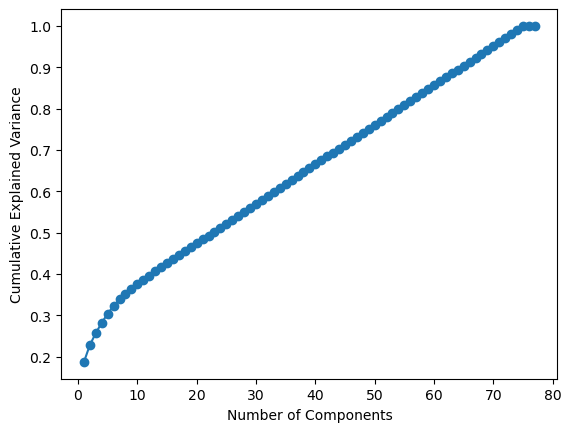

In [32]:
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## E. Selecting the number of components (e.g., explaining ~90% variance)

In [34]:
n_components = next(i for i, v in enumerate(explained_variance) if v > 0.9)
pca = PCA(n_components = n_components)
df_pca = pca.fit_transform(df_scaled)

# Step-5: Determine Optimal Clusters Using K-Means

## A. Importing the libraries

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## B. Elbow method and Silhouette score analysis

In [39]:
sse = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

## C. Plot SSE and Silhouette Score

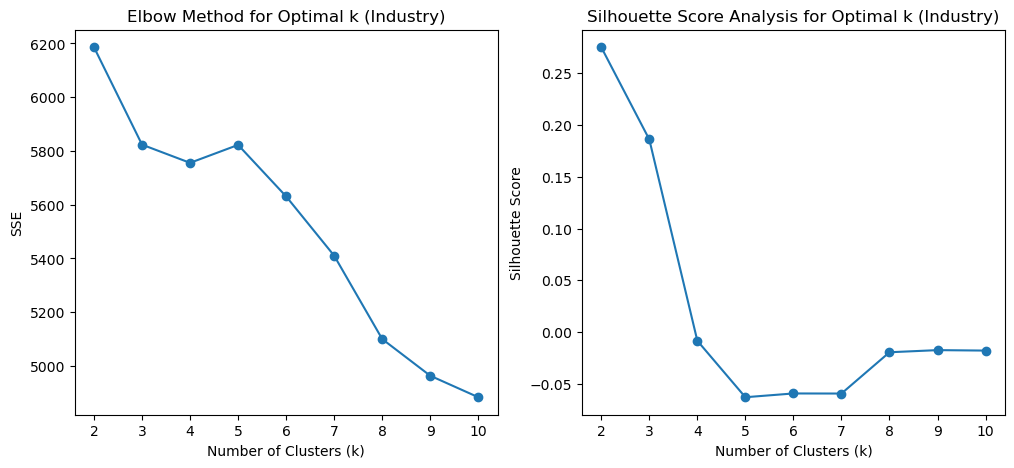

In [41]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k (Industry)')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis for Optimal k (Industry)')

plt.show()

# Step-6: Perform K-Means Clustering

## A. Finding the the optimal k and adding the cluster labels to the original data

In [44]:
optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
df['Cluster'] = kmeans.fit_predict(df_pca)

C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## B. Display the first few rows with cluster labels

In [46]:
df.head()

,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,total_persons_engaged,wages_workers,total_emoluments,pf_esi_others,...,Industry_Tobacco products,Industry_Transport Equipment n.e.c.,Industry_Vegetable and animal oils and fats,Industry_Waste Collection,Industry_Waste Treatment and Disposal,Industry_Weapons and Ammunition,Industry_Wearing apparel except fur,Industry_Wiring Devices,Industry_Wood Products etc.,Cluster
0,3226,7.451960e+10,1.550000e+11,2.520000e+11,8.901980e+10,64408,83315,1.014880e+10,2.129680e+10,1561200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,131,6.623900e+09,3.749000e+09,9.121200e+09,2.786300e+09,6829,7928,9.300000e+08,1.503400e+09,173000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,187,3.387770e+10,2.916350e+10,5.641780e+10,1.283990e+10,25188,31822,4.624300e+09,9.515600e+09,903000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,706,8.898990e+10,1.010000e+11,1.930000e+11,3.890790e+10,90526,111882,1.549340e+10,2.849330e+10,3018700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1346,1.230000e+11,7.125930e+10,1.970000e+11,1.000000e+11,70853,90481,1.223510e+10,2.556220e+10,2797800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Step-7: Visualizing the clusters on the PCA-reduced data

## A. Importing the library

In [49]:
import seaborn as sns

## B. Plotting the Clusters

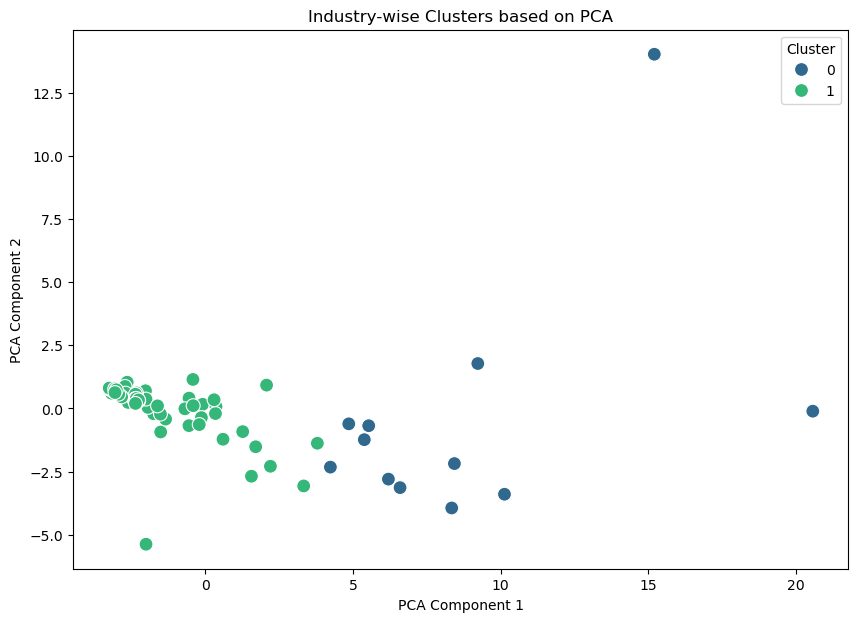

In [51]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = df_pca[:, 0], y = df_pca[:, 1], hue = df['Cluster'], palette = 'viridis', s = 100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Industry-wise Clusters based on PCA')
plt.legend(title = 'Cluster')
plt.show()

## C. View the names of the higher performing industries i.e. Industries belonging to Cluster 0

In [53]:
X = pd.read_csv('iws.csv')
df.insert(0, 'Industry', X['Industry'])
ic1 = df[df['Cluster'] == 0]['Industry']
print(ic1)

8                             Misc. Food Products
12    Spinning, weaving and finishing of textiles
24                     Refined petroleum products
25                           Basic Chemicals etc.
26                                Other Chemicals
28                      Pharmaceuticals  Products
32                  Non Metallic Mineral Products
33                           Basic Iron and Steel
53                      General Purpose Machinery
55                                 Motor Vehicles
57                        Parts of Motor Vehicles
76                                         Others
Name: Industry, dtype: object


## D. Save the clustered data

In [55]:
df.to_csv('segmented_industries.csv', index = False)